**Importing the Libraries**

In [510]:
import pandas as pd
import numpy as np


In [511]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [513]:
df = sns.load_dataset('titanic')

In [514]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Initial Analysis on the Dataset**

In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [517]:
df.drop(['embarked','class','alive'],axis=1,inplace=True)

In [518]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


**Exploratory Data Analysis(EDA)**

In [520]:
def check_missing_values(dataframe):
    null_num = []
    for i in dataframe.columns: 
        x= dataframe[i].isnull().sum()
        null_num.append(x)
    return pd.DataFrame(null_num,index=dataframe.columns,columns=['Total Missing Values'])

In [521]:
check_missing_values(df)

,Total Missing Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


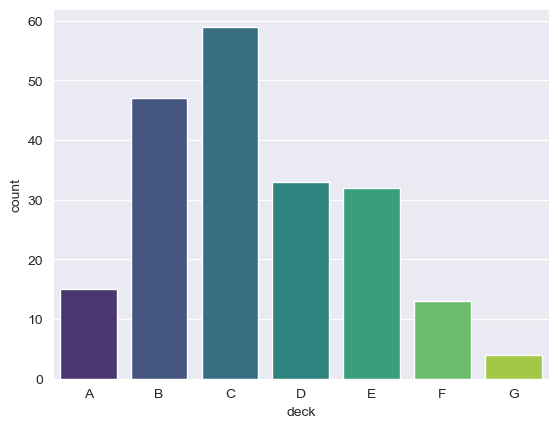

In [522]:
sns.set_style('darkgrid')
sns.countplot(x='deck',data=df,palette='viridis');

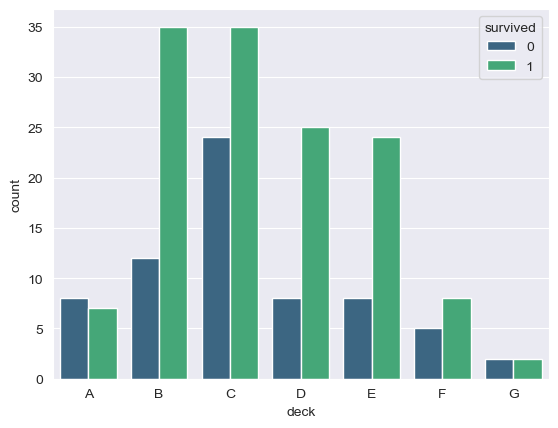

In [523]:
sns.set_style('darkgrid')
sns.countplot(x='deck',hue='survived',data=df,palette='viridis');

In [524]:
df.drop(['deck','adult_male','sibsp','parch'],axis=1,inplace=True)

In [525]:
df.head()

,survived,pclass,sex,age,fare,who,embark_town,alone
0,0,3,male,22.0,7.2500,man,Southampton,False
1,1,1,female,38.0,71.2833,woman,Cherbourg,False
2,1,3,female,26.0,7.9250,woman,Southampton,True
3,1,1,female,35.0,53.1000,woman,Southampton,False
4,0,3,male,35.0,8.0500,man,Southampton,True


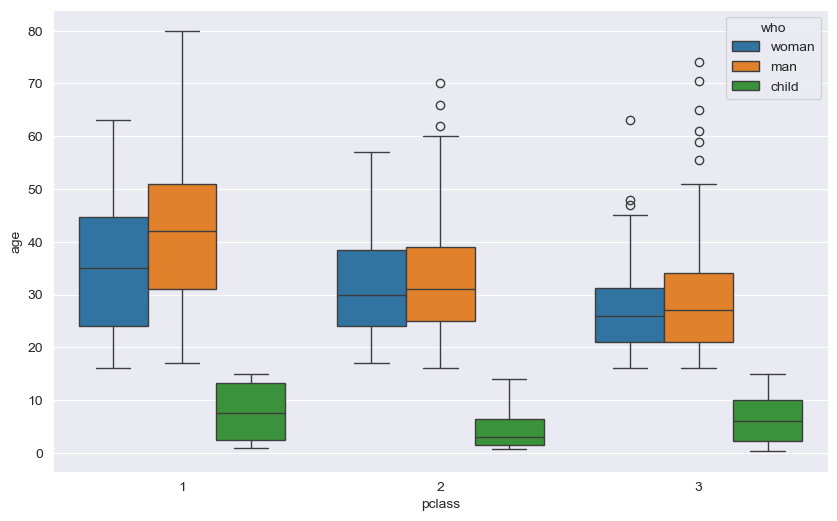

In [526]:
plt.figure(figsize=(10,6))
sns.boxplot(x='pclass',y='age',hue= 'who',data=df);

In [527]:
def age_estimation(columns):
    age=columns[0]
    pclass=columns[1]
    who=columns[2]
    filt = (df['pclass']==pclass) & (df['who']==who) & ~(df['age'].isnull())
    if pd.isnull(age):
        if pclass ==1:
            if who=='man':
                return np.median(df.loc[filt,'age'])
            elif who=='woman':
                return np.median(df.loc[filt,'age'])
            else:
                return np.median(df.loc[filt,'age'])

        elif pclass ==2:
            if who=='man':
                return np.median(df.loc[filt,'age'])
            elif who=='woman':
                return np.median(df.loc[filt,'age'])
            else:
                return np.median(df.loc[filt,'age'])

        else:
            if who=='man':
                return np.median(df.loc[filt,'age'])
            elif who=='woman':
                return np.median(df.loc[filt,'age'])
            else:
                return np.median(df.loc[filt,'age'])
    else:
        return age

In [528]:
df['age'] = df[['age','pclass','who']].apply(age_estimation,axis=1)

In [529]:
check_missing_values(df)

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
fare,0
who,0
embark_town,2
alone,0


In [530]:
df.dropna(axis=1,inplace=True)

In [531]:
check_missing_values(df)

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
fare,0
who,0
alone,0


In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   fare      891 non-null    float64
 5   who       891 non-null    object 
 6   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 42.8+ KB


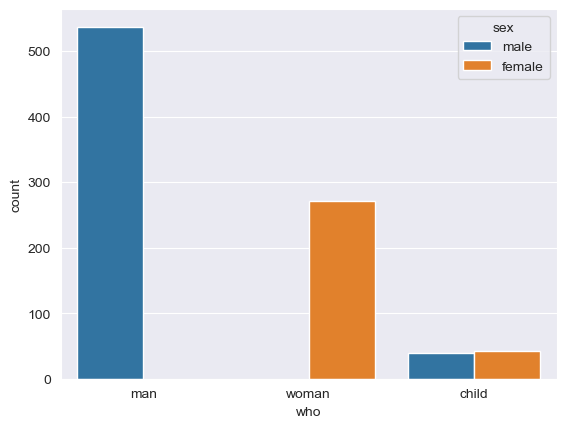

In [533]:
sns.countplot(x='who',data=df,hue='sex');

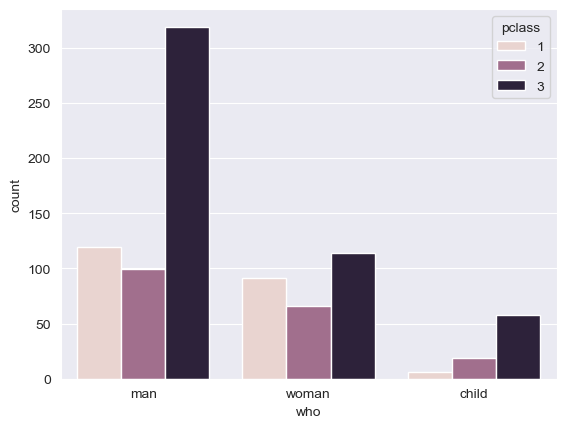

In [534]:
sns.countplot(x='who',data=df,hue='pclass');

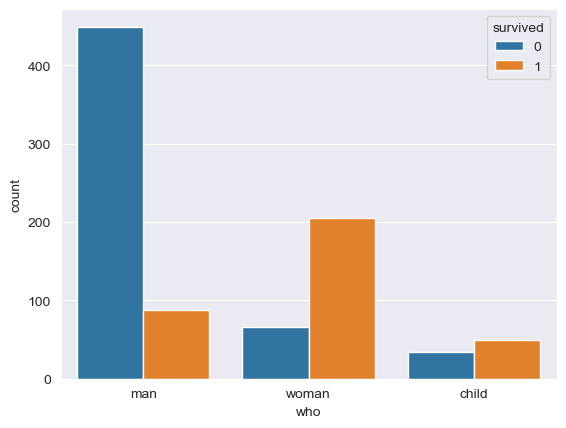

In [535]:
sns.countplot(x='who',data=df,hue='survived');

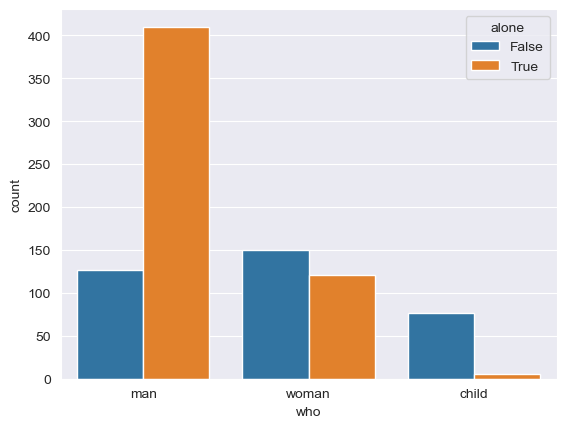

In [536]:
sns.countplot(x='who',data=df,hue='alone');

In [537]:
pd.crosstab(df.who,[df.survived,df.alone,df.pclass],rownames=['Category'],)

survived     0                            1                      
alone    False         True           False         True         
pclass       1   2   3     1   2    3     1   2   3     1   2   3
Category                                                         
child        1   0  31     0   0    2     5  19  21     0   0   4
man         27  26  50    50  65  231    17   1   6    25   7  32
woman        1   3  36     1   3   22    56  31  23    33  29  33

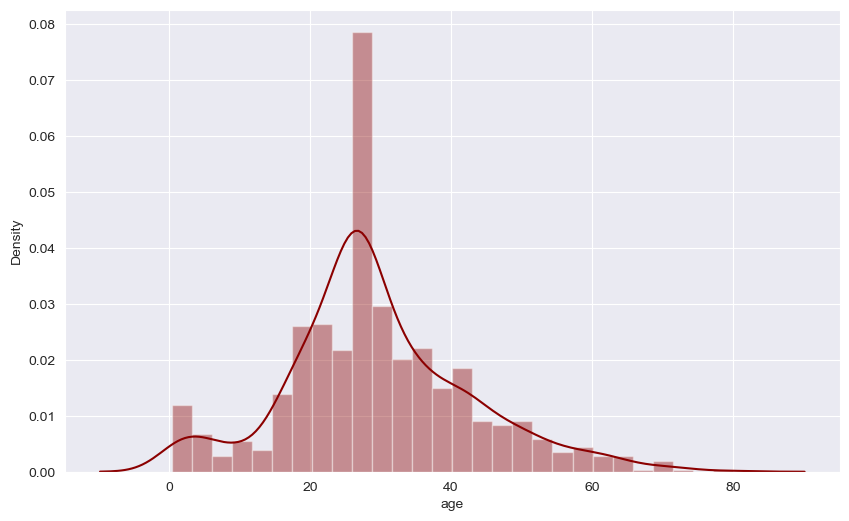

In [538]:
plt.figure(figsize=(10,6))
sns.distplot(df['age'],color='darkred');

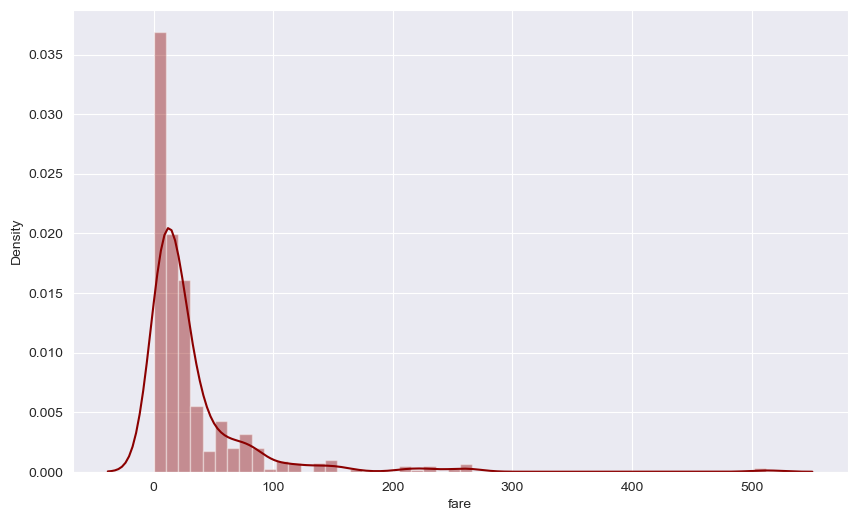

In [539]:
plt.figure(figsize=(10,6))
sns.distplot(df['fare'],color='darkred');

In [540]:
df.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

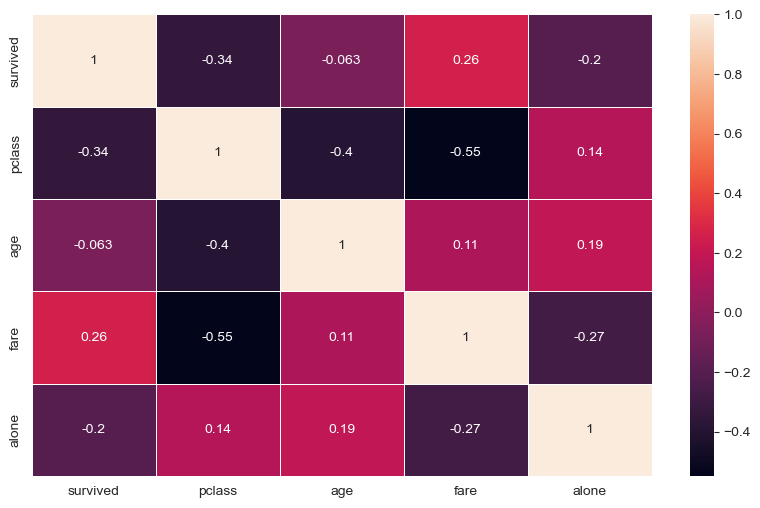

In [541]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True,lw=.5);

In [542]:
df.head()

,survived,pclass,sex,age,fare,who,alone
0,0,3,male,22.0,7.2500,man,False
1,1,1,female,38.0,71.2833,woman,False
2,1,3,female,26.0,7.9250,woman,True
3,1,1,female,35.0,53.1000,woman,False
4,0,3,male,35.0,8.0500,man,True


In [543]:
df.pclass =df.pclass.astype('O')

In [544]:
X = pd.get_dummies(df.drop(['survived'],axis=1),drop_first=True)
y = df.survived

**Modelling**

In [546]:
from sklearn.model_selection import train_test_split

In [547]:
from sklearn.preprocessing import StandardScaler

In [548]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25, random_state=42)

In [549]:
sc = StandardScaler()

In [550]:
X_train[:,:2] = sc.fit_transform(X_train[:,:2])
X_test[:,:2] = sc.transform(X_test[:,:2])

In [551]:
X_train

array([[0.9587621310247045, -0.03256830400078319, True, ..., True, True,
        False],
       [-0.3295465461174333, -0.4873308540420782, True, ..., True, True,
        False],
       [-0.4053294094787355, -0.34285405242981176, False, ..., False,
        False, True],
       ...,
       [0.8829792676634023, -0.3504502354085399, False, ..., True, True,
        False],
       [-1.1631580430917576, 1.7030926012740955, False, ..., False,
        False, False],
       [-0.6326779995626421, 0.8747750994131651, False, ..., True, True,
        False]], dtype=object)

In [552]:
from sklearn.linear_model import LogisticRegression

In [553]:
lr_model = LogisticRegression()

In [554]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [555]:
y_pred = lr_model.predict(X_test)

In [556]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [557]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       134
           1       0.76      0.70      0.73        89

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



In [558]:
print(confusion_matrix(y_test,y_pred))

[[114  20]
 [ 27  62]]
